<a href="https://colab.research.google.com/github/swapnalishamrao/Supervised_ML_Classification_Project/blob/main/Supervised_ML_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size='8px'><font color='indigo'><u>**Airline_Passenger_Referral_Prediction**

##### **Project Type**    - Supervised ML Classification
##### **Contribution**    - Individual
##### **Name**            - Swapnali Shamrao Mane

# <font size='6px'><font color='red'><u>**Project Summary & Technical Documentation-**

Air travel changed the world by connecting people globally in record time, making it a standout invention of the 1900s. Its main strength, speed, turned it into an essential way to transport both goods and people.

In the fast-paced world of air travel, where making passengers happy is crucial, airlines need to predict which passengers will recommend them to others. Knowing which passengers are likely to tell their friends and networks about an airline can significantly improve customer satisfaction and increase profits.

###**Steps**:

 **Getting Data**

 **Cleaning & Preprocessing Data**:

 This involves fixing missing information, handling extreme values, and making data easier to use for analysis.

 **Exploring Data Analysis(EDA)**:

  This means looking at the data using different graphs and charts.

**Dividing the Data**:

Splitting it into parts for training and testing.

**Choosing Models and Hyperparameter Tuning**:

To make accurate predictions, various classification models are used, such as Logistic Regression, Random Forests, and Support Vector Machines (SVM). . Ensuring model reliability, hyperparameter tuning is performed to optimize performance and mitigate overfitting of these models helps make them work better.

**Measuring Performance**:

 This focuses on metrics that tell how well the models work. The most important is Recall, followed by Accuracy and ROC AUC. These metrics show how well the models can correctly identify passengers who will recommend airlines. This is essential for making customer-focused strategies.

#<font size='4px'><font color='3971'><u> **GitHub Link -**

[GitHub Link](https://github.com/swapnalishamrao/Supervised_ML_Classification_Project)

# <font size='6px'><font color='paintgray'><u>**Problem Statement-**


In the competitive airline industry, pleasing customers and keeping them loyal is crucial for success. Airlines are always looking for new ways to make passengers happier and improve their reputation. One big challenge is figuring out which passengers are likely to recommend the airline to others.

The goal is to create a model that can predict which passengers will refer the airline to their friends. This model will help airlines:

  -Make customers happier

  -Make more money

  -Advertise more effectively

  -Provide better service
Stay ahead of the competition



# <font size='6px'><font color='indi'>***Let's Begin !***

## ***1. Know Your Data***

## <font size='5px'><font color='indigo'>**Importing Library and connecting drive**

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Importing all models from sklearn to be used in model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing  metrics for evaluation of models
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,f1_score,roc_curve, roc_auc_score

## **Dataset Loading**

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load the dataset from drive
df = pd.read_excel("/content/drive/MyDrive/data_airline_reviews.xlsx")

##<font size='5px'><font color='darkorange'> **Dataset First View**

In [4]:
# First Five Observations
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Last five observations
df.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


##<font size='5px'><font color='#skyblue'> **Data Inispection**

In [6]:
# Checking shape of the dataset
df.shape

(131895, 17)

Dataset having 131895 observations and 17 columns.

In [7]:
# Checking columns name of dataset
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

##<font size='5px'><font color='deeppink'>**Dataset Information**

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

1.In the dataset, there are object, float64 dtypes features present.

2.Dataset is having numerical and categorical data.

3.Mixed data (Numerical+Categorical)

4.There are 17 features

In [9]:
# Basic description of Dataset
df.describe(include='all')

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
count,65947,64017.000000,65947,65947,65947,19718,39755,63303,39726,39633,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000,64440
unique,81,NaN,44069,3015,61172,2088,4,4,24549,63,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Spirit Airlines,NaN,Anders Pedersen,19th January 2015,On March 2/14 a friend and I were booked on an...,A320,Solo Leisure,Economy Class,Bangkok to Hong Kong,August 2015,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,2934,NaN,96,253,6,2157,14798,48558,35,1204,NaN,NaN,NaN,NaN,NaN,NaN,33894
mean,NaN,5.145430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962,NaN
std,NaN,3.477532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,NaN
50%,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,NaN
75%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,NaN


##<font size='5px'><font color='darkcyan'>**Checking duplicate values**

In [10]:
# Checking duplicated values in dataset
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 70711 duplicated values


##<font size='5px'><font color='red'>**Checking Missing Values/Null Values**

In [11]:
# Checking for number of null values
missing_values=df.isnull().sum()
missing_values

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

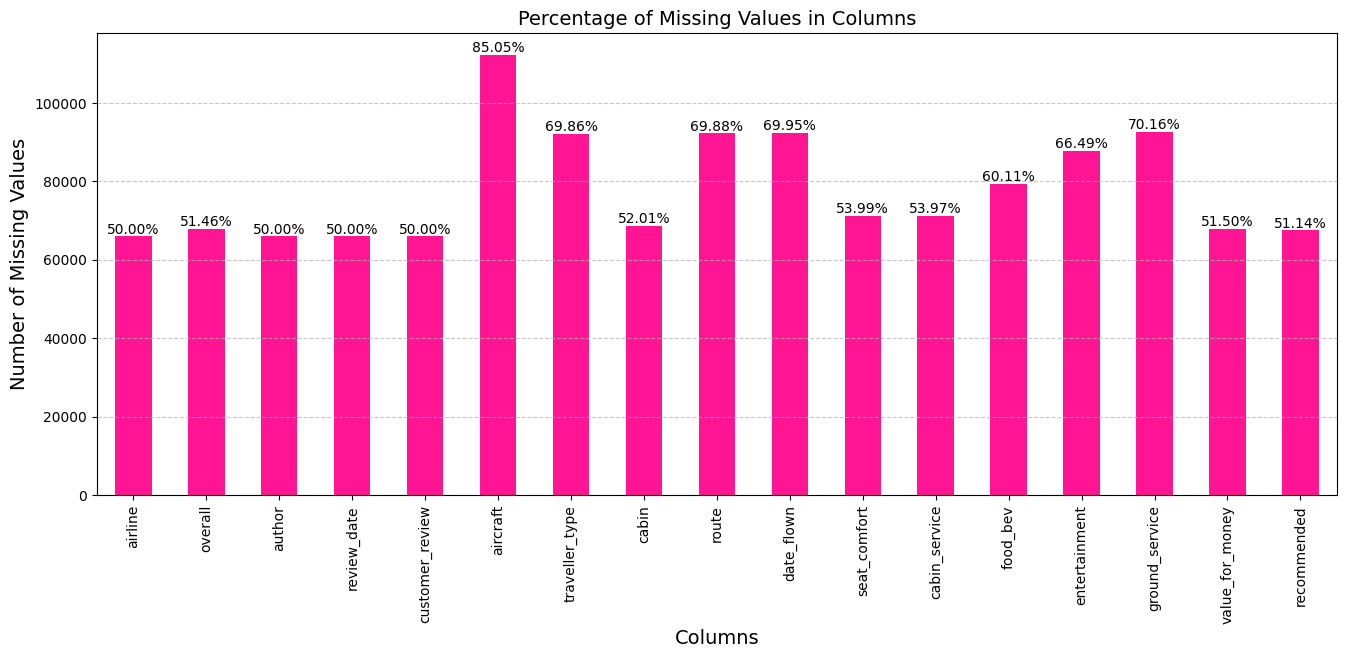

In [12]:
# Visualizing the missing values

columns_with_missing_values = missing_values[missing_values > 0]      #  Filter columns with missing values

# Calculate the percentage of missing values in each column
total_rows = len(df)
percentage_missing = (columns_with_missing_values / total_rows) * 100

# Create a bar chart
plt.figure(figsize=(16, 6))
bar_plot = columns_with_missing_values.plot(kind='bar', color='deeppink')
plt.xlabel('Columns',fontsize=14)
plt.ylabel('Number of Missing Values',fontsize=14)
plt.title('Percentage of Missing Values in Columns',fontsize=14)
plt.xticks(rotation=90, ha='center',fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the percentage of missing values on top of each bar
for index, value in enumerate(columns_with_missing_values):
    plt.text(index, value, f'{percentage_missing[index]:.2f}%', ha='center', va='bottom',fontsize=10)

plt.show()

### What did you know about your dataset?

 -The dataset is well-prepared for further analysis, as it contains 131895 rows and 17 features.

 -There are some missing values in every feature, which need to be fixed either by using the fillna method or dropping the rows.

-Additionally, there are 70711 duplicate rows, which also need to be dropped. so that there is a clean and unique dataset for analysis.

-Most of the features are either objects or floats. If necessary, it needs to be converted into the required datatype.

-After the necessary cleaning, the dataset will be ready for preprocessing steps, allowing the focus to be on feature engineering and model development to achieve accurate predictions.

##<font size='5px'><font color='darkgreen'>**2. Understanding Your Variables**

In [13]:
# Dataset Columns
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

### <font size='5px'><font color='darkorange'>**Variables Description**

**airline:** Name of the airline.

**overall:** Overall point is given to the trip between 1 to 10.

**author:** Author of the trip

**review date:** Date of the Review

**customer review:**Review of the customers in free text format

**aircraft:** Type of the aircraft

**traveller type:** Type of traveler (e.g. business, leisure)

**cabin:** Cabin at the flight date flown: Flight date

**seat comfort:** Rated between 1-5

**cabin service:** Rated between 1-5

**foodbev:** Rated between 1-5

**entertainment:** Rated between 1-5

**ground service:** Rated between 1-5

**value for money:** Rated between 1-5

**recommended**: Binary, target variable.

### <font size='5px'><font color='indigo'>**Check Unique Values for each variable.**

In [14]:
# Check Unique Values for each variable.
df.nunique()

airline               81
overall               10
author             44069
review_date         3015
customer_review    61172
aircraft            2088
traveller_type         4
cabin                  4
route              24549
date_flown            63
seat_comfort           5
cabin_service          5
food_bev               5
entertainment          5
ground_service         5
value_for_money        5
recommended            2
dtype: int64

In [15]:
#Overall discription of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,64017.0,5.145430,3.477532,1.0,1.0,5.0,9.0,10.0
seat_comfort,60681.0,2.952160,1.441362,1.0,1.0,3.0,4.0,5.0
cabin_service,60715.0,3.191814,1.565789,1.0,2.0,3.0,5.0,5.0
food_bev,52608.0,2.908170,1.481893,1.0,1.0,3.0,4.0,5.0
entertainment,44193.0,2.863372,1.507262,1.0,1.0,3.0,4.0,5.0
ground_service,39358.0,2.692820,1.612215,1.0,1.0,3.0,4.0,5.0
value_for_money,63975.0,2.943962,1.587370,1.0,1.0,3.0,4.0,5.0


In [16]:
# Finding categorical variables
categorical_variables = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical_variables)))
print('--'*45)
print(categorical_variables)

There are 10 categorical variables
------------------------------------------------------------------------------------------
['airline', 'author', 'review_date', 'customer_review', 'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown', 'recommended']


In [17]:
for col in df.select_dtypes(include='object').columns:
  print(col)
  print(df[col].unique())
  print('--'*45)

airline
[nan 'Turkish Airlines' 'Qatar Airways' 'Emirates' 'Lufthansa'
 'KLM Royal Dutch Airlines' 'Virgin America' 'American Airlines'
 'Delta Air Lines' 'Southwest Airlines' 'United Airlines'
 'Jetblue Airways' 'Aegean Airlines' 'Aeroflot Russian Airlines'
 'Aeromexico' 'Air Canada' 'Air New Zealand' 'Alitalia' 'AirAsia'
 'Asiana Airlines' 'Avianca' 'Austrian Airlines' 'British Airways'
 'Brussels Airlines' 'China Eastern Airlines' 'China Southern Airlines'
 'Copa Airlines' 'Ethiopian Airlines' 'Egyptair' 'Finnair' 'Iberia'
 'ANA All Nippon Airways' 'easyJet' 'Korean Air' 'LATAM Airlines'
 'LOT Polish Airlines' 'Qantas Airways' 'Air France' 'Etihad Airways'
 'Pegasus Airlines' 'Royal Jordanian Airlines' 'Ryanair'
 'South African Airways' 'Saudi Arabian Airlines' 'TAP Portugal'
 'Eurowings' 'EVA Air' 'Royal Air Maroc' 'Singapore Airlines'
 'SAS Scandinavian' 'Swiss Intl Air Lines' 'Thai Airways' 'Air India'
 'Air Europa' 'Air Canada rouge' 'airBaltic' 'Air China'
 'Cathay Pacific Airw

In [18]:
# Finding numerical variables
numerical_variables=[var for var in df.columns if var not in categorical_variables]
print('There are {} numerical variables'.format(len(numerical_variables)))
print('--'*45)
print(numerical_variables)

There are 7 numerical variables
------------------------------------------------------------------------------------------
['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']


In [19]:
# Checking unique values from each variable
for i in df.columns.tolist():
  print("No. of unique values in", i ,"is", df[i].nunique())
  print('--'*50)

No. of unique values in airline is 81
----------------------------------------------------------------------------------------------------
No. of unique values in overall is 10
----------------------------------------------------------------------------------------------------
No. of unique values in author is 44069
----------------------------------------------------------------------------------------------------
No. of unique values in review_date is 3015
----------------------------------------------------------------------------------------------------
No. of unique values in customer_review is 61172
----------------------------------------------------------------------------------------------------
No. of unique values in aircraft is 2088
----------------------------------------------------------------------------------------------------
No. of unique values in traveller_type is 4
----------------------------------------------------------------------------------------------------

In [20]:
#Checking the unique values of the target variable
df.recommended.unique()

array([nan, 'yes', 'no'], dtype=object)